# Анализ данных по рекламным кампаниям

Файл test_data.csv содержит в себе данные по проведенным пятью медиабайерами рекламным кампаниям.
Имеющиеся поля:

| Поле                         | Описание                                                                                       |
|:----------------------------|:----------------------------------------------------------------------------------------------|
| `Campaign_id`                | ID кампании                                                                                    |
| `Geo`                        | геопозиция, на которую настроена рекламная кампания                                            |
| `Buyer`                      | байер, выполнивший запуск                                                                      |
| `Impressions`                | количество показов рекламных объявлений                                                        |
| `Clicks`                     | количество кликов                                                                              |
| `Installs`                   | количество установок                                                                           |
| `Registrations`              | количество регистраций                                                                         |
| `Spend`                      | затраченная сумма                                                                              |
| `Revenue_ad (1d/7d/30d)`     | выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни |
| `Revenue_in_app (1d/7d/30d)` | выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни |
| `Payers (1d/7d/30d)`         | количество покупателей в приложении на 1/7/30 день их жизни                                    |

## Импорт данных и библиотек

Импортируем необходимые для работы библиотеки.

In [1]:
!pip install kaleido
import pandas as pd
import plotly.express as px
import plotly.io as pio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00


Импортируем данные.

In [2]:
data = pd.read_csv('test_data.csv', decimal=',')
data.head(3)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6


## Анализ и визуализация

### CTR (Click-through rate)

Исследуем данные относительно метрики CTR. Для этого оставим только необходимые нам для подсчета данные и рассчитаем значения CTR для каждой проведенной кампании.

In [3]:
ctr_data = data[['Campaign_id', 'Geo', 'Buyer', 'Impressions', 'Clicks']].copy()
ctr_data.head(3)

,Campaign_id,Geo,Buyer,Impressions,Clicks
0,1,north america,buyer_1,3456974,129508
1,2,north america,buyer_2,245542,6306
2,3,north america,buyer_1,1281103,35724


In [4]:
ctr_data['CTR, %'] = ctr_data['Clicks'] / ctr_data['Impressions'] * 100
ctr_data.head(3)

,Campaign_id,Geo,Buyer,Impressions,Clicks,"CTR, %"
0,1,north america,buyer_1,3456974,129508,3.746282
1,2,north america,buyer_2,245542,6306,2.568196
2,3,north america,buyer_1,1281103,35724,2.788535


Теперь, после того, как мы рассчитали метрику, ответим на вопросы, связанные с ней.

#### Вопрос 1: кто из медиабайеров показал себя наилучшим образом относительно кликабельности?

Чтобы ответить на первый вопрос, построим boxplot, который покажет, как распределились значения для каждого медиабайера.

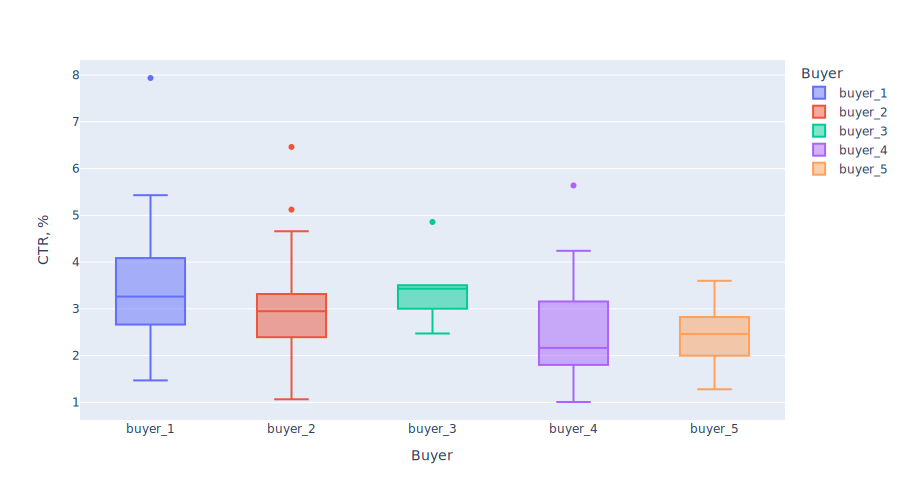

In [5]:
fig = px.box(ctr_data, x='Buyer', y='CTR, %', color = 'Buyer', width = 900)
fig.show('svg');

In [6]:
ctr_data.groupby('Buyer')['CTR, %'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Buyer,,,,,,,,
buyer_1,18.0,3.63,1.44,1.47,2.69,3.26,4.07,7.94
buyer_2,39.0,2.95,1.08,1.07,2.40,2.95,3.32,6.46
buyer_3,6.0,3.45,0.79,2.47,3.10,3.43,3.50,4.86
buyer_4,16.0,2.57,1.25,1.01,1.82,2.16,3.14,5.64
buyer_5,8.0,2.43,0.71,1.28,2.14,2.46,2.79,3.60


**Вывод**: На графике видно, что выше всего среди медианных значений находится показатель для третьего байера, равный 3,43%. Однако даже этот показатель не проходит границу в 7%, что является наименьшим значением "нормального" CTR. Это может быть связано с большим количеством "неудачных" рекламных кампаний, которые также не смогли преодолеть границу в 7%.
Единственное значение на графике, превыщающее 7% — верхний выброс у первого байера, равный 7,94%.
Хуже всего себя показал четвертый байер, с медианным значением 2,16%.

#### Вопрос 2: какие геолокации показали себя наилучшим образом относительно кликабельности?

Для того, чтобы ответить на второй вопрос, снова построим boxplot, который покажет, как распределились значения в каждой локации.

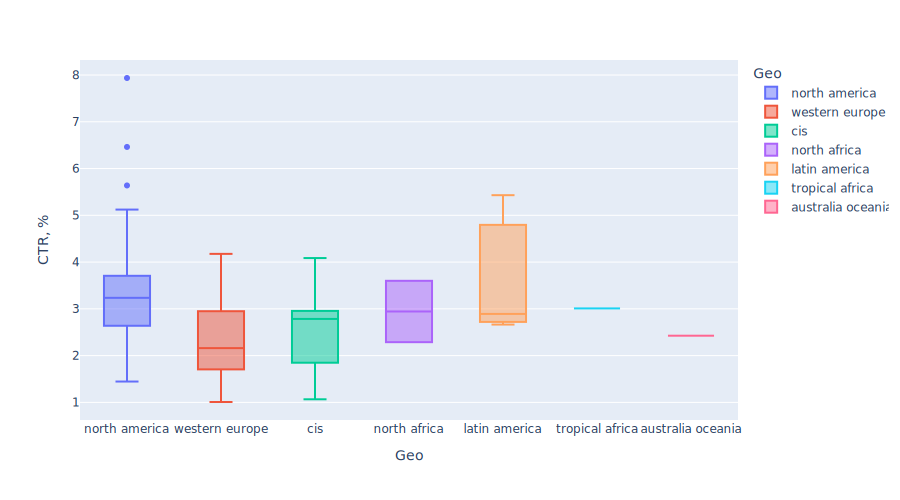

In [7]:
fig = px.box(ctr_data, x = 'Geo', y = 'CTR, %', color = 'Geo', width = 900)
fig.show('svg');

In [8]:
ctr_data.groupby('Geo')['CTR, %'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Geo,,,,,,,,
australia oceania,1.0,2.43,NaN,2.43,2.43,2.43,2.43,2.43
cis,10.0,2.47,0.95,1.07,1.87,2.78,2.93,4.09
latin america,3.0,3.66,1.54,2.66,2.78,2.89,4.16,5.43
north africa,2.0,2.94,0.93,2.29,2.62,2.94,3.27,3.60
north america,48.0,3.39,1.22,1.45,2.65,3.24,3.69,7.94
tropical africa,1.0,3.01,NaN,3.01,3.01,3.01,3.01,3.01
western europe,22.0,2.35,0.96,1.01,1.71,2.16,2.87,4.18


**Вывод**: По данному графику видно, что наибольшее медианное значение CTR у Северной Америки, где оно равно 3,24%. Это, опять же, не проходит границу в 7%, но является наилучшим результатом среди всех геолокаций. Самое низкое медианное значение CTR у Западной Европы — 2,16%.

#### Вопрос 3: какие кампании показали себя наилучшим образом относительно кликабельности?

Ответим на этот вопрос, построив barchart и выделив на нем топ-10 кампаний по CTR.

In [9]:
ctr_data_top = ctr_data[['Campaign_id', 'CTR, %']].copy()
ctr_data_top['Top10'] = False
ctr_data_top.loc[ctr_data_top['CTR, %'] >= ctr_data_top.nlargest(10, 'CTR, %')['CTR, %'].iloc[9], 'Top10'] = True
ctr_data_top.head(3)

,Campaign_id,"CTR, %",Top10
0,1,3.746282,False
1,2,2.568196,False
2,3,2.788535,False


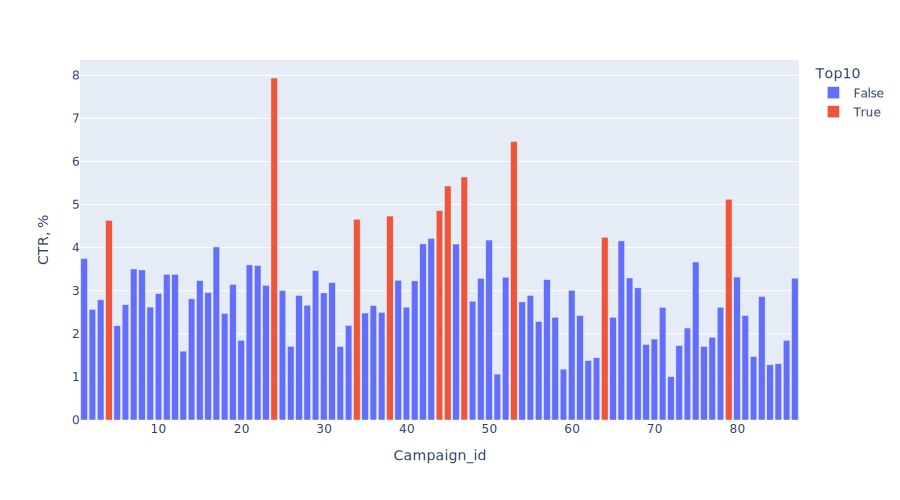

In [10]:
fig = px.bar(ctr_data_top, x = 'Campaign_id', y = 'CTR, %', color = 'Top10', width = 900)
fig.show('svg');

In [11]:
ctr_data_top.nlargest(10, 'CTR, %')[['Campaign_id', 'CTR, %']].round(2)

,Campaign_id,"CTR, %"
23,24,7.94
52,53,6.46
46,47,5.64
44,45,5.43
78,79,5.12
43,44,4.86
37,38,4.73
33,34,4.66
3,4,4.63
63,64,4.24


**Вывод**: На графике показано значение CTR для каждой проведенной кампании, а красным цветом выделены 10 кампаний, которые показали себя наилучшим образом относительно коэффициента кликабельности. Таким образом, на первом месте оказалась кампания с `Campaign_id` равным 24, показавшая результат CTR = 7,94%, на втором кампания с номером 53 и CTR, равным 6,46%, а на третьем — с `Campaign_id` = 47 и CTR = 5,64%.

### ROI (Return on Investment)

Оценим данные с точки зрения метрики ROI. Для расчетов используем показатели выручки от рекламы и покупок на 30 день жизни пользователей. Для этого оставим только необходимые для подсчета поля, и добавим поле, содержащее значение ROI для каждой кампании.

In [12]:
roi_data = data[['Campaign_id', 'Geo', 'Buyer', 'Spend', 'Revenue_ad30d', 'Revenue_in_app30d']].copy()
roi_data.head(3)

,Campaign_id,Geo,Buyer,Spend,Revenue_ad30d,Revenue_in_app30d
0,1,north america,buyer_1,3208.440002,1527.013835,276.629998
1,2,north america,buyer_2,1569.519999,1449.001828,120.250001
2,3,north america,buyer_1,1231.999998,572.633765,24.700000


In [13]:
roi_data['ROI30d, %'] = (roi_data['Revenue_ad30d'] + roi_data['Revenue_in_app30d'] - \
                         roi_data['Spend']) / roi_data['Spend'] * 100
roi_data.head(3)

,Campaign_id,Geo,Buyer,Spend,Revenue_ad30d,Revenue_in_app30d,"ROI30d, %"
0,1,north america,buyer_1,3208.440002,1527.013835,276.629998,-43.784399
1,2,north america,buyer_2,1569.519999,1449.001828,120.250001,-0.017086
2,3,north america,buyer_1,1231.999998,572.633765,24.700000,-51.515116


#### Вопрос 1: кто из байеров показал себя наилучшим образом с точки зрения ROI?

Построим boxplot, чтобы посмотреть, как в отношении каждого байера распределились значения ROI кампаний.

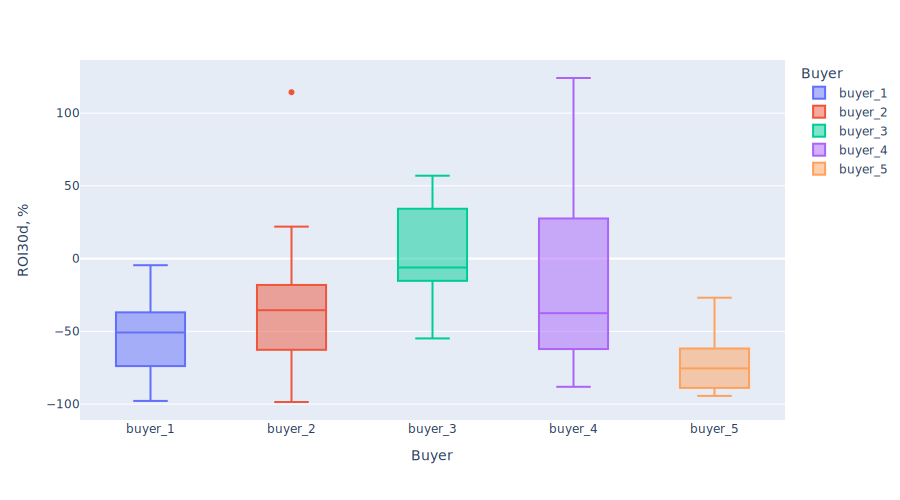

In [14]:
fig = px.box(roi_data, x='Buyer', y='ROI30d, %', color = 'Buyer', width = 900)
fig.show('svg');

In [15]:
roi_data.groupby('Buyer')['ROI30d, %'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Buyer,,,,,,,,
buyer_1,18.0,-51.54,25.60,-97.83,-73.53,-50.78,-38.59,-4.56
buyer_2,39.0,-37.19,38.55,-98.57,-62.18,-35.48,-19.51,114.34
buyer_3,6.0,1.46,39.44,-54.87,-14.30,-6.13,25.44,56.96
buyer_4,16.0,-15.66,58.67,-88.12,-59.64,-37.52,22.16,124.10
buyer_5,8.0,-71.69,22.75,-94.37,-88.58,-75.46,-62.28,-26.89


**Вывод**: График показал, что все медианные значения ROI расположились ниже 0, то есть приносят убытки. Абсолютно все кампании оказались с отрицательными ROI значениями у первого и пятого байеров. Лучше всего себя показал третий байер, медианное значение у которого оказалось равно -6,13%.

#### Вопрос 2: в каких геолокациях оказались наилучшие показатели ROI?

Для оценки распределения ROI относительно геолокаций построим boxplot.

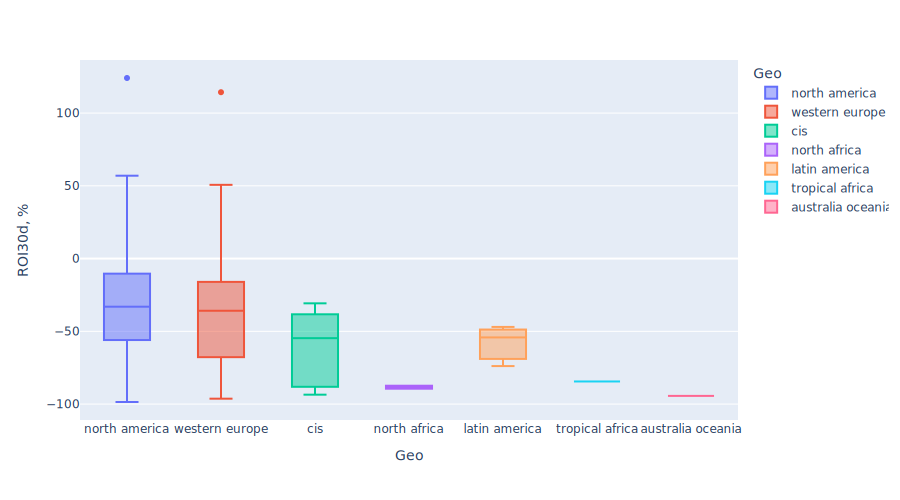

In [16]:
fig = px.box(roi_data, x = 'Geo', y = 'ROI30d, %', color = 'Geo', width = 900)
fig.show('svg');

In [17]:
roi_data.groupby('Geo')['ROI30d, %'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Geo,,,,,,,,
australia oceania,1.0,-94.37,NaN,-94.37,-94.37,-94.37,-94.37,-94.37
cis,10.0,-59.29,23.65,-93.53,-81.89,-54.69,-39.58,-30.76
latin america,3.0,-58.34,13.93,-73.88,-64.03,-54.18,-50.58,-46.97
north africa,2.0,-88.41,1.45,-89.43,-88.92,-88.41,-87.89,-87.38
north america,48.0,-28.48,42.08,-98.57,-55.43,-33.07,-10.38,124.10
tropical africa,1.0,-84.46,NaN,-84.46,-84.46,-84.46,-84.46,-84.46
western europe,22.0,-31.94,48.97,-96.28,-66.11,-35.86,-17.94,114.34


**Вывод**: Относительно геолокаций все медианные значения ROI оказались ниже значения 0. Лучше всего себя, однако, показала Северная Америка, с медианным значением, равным -33,07%. Для Северной Америки и Западной Европы наблюдаются выбросы со значениями 124,1% и 114,34% соответственно.

#### Вопрос 3: какие кампании показали наилучшие результаты относительно ROI?

Чтобы ответить на этот вопрос, построим barchart, выделив 10 столбцов с наибольшими значениями ROI.

In [18]:
roi30d_data = roi_data[['Campaign_id', 'ROI30d, %']].copy()
roi30d_data['Top10'] = False
roi30d_data.loc[roi30d_data['ROI30d, %'] >= roi_data.nlargest(10, 'ROI30d, %')['ROI30d, %'].iloc[9], 'Top10'] = True
roi30d_data.head(3)

,Campaign_id,"ROI30d, %",Top10
0,1,-43.784399,False
1,2,-0.017086,False
2,3,-51.515116,False


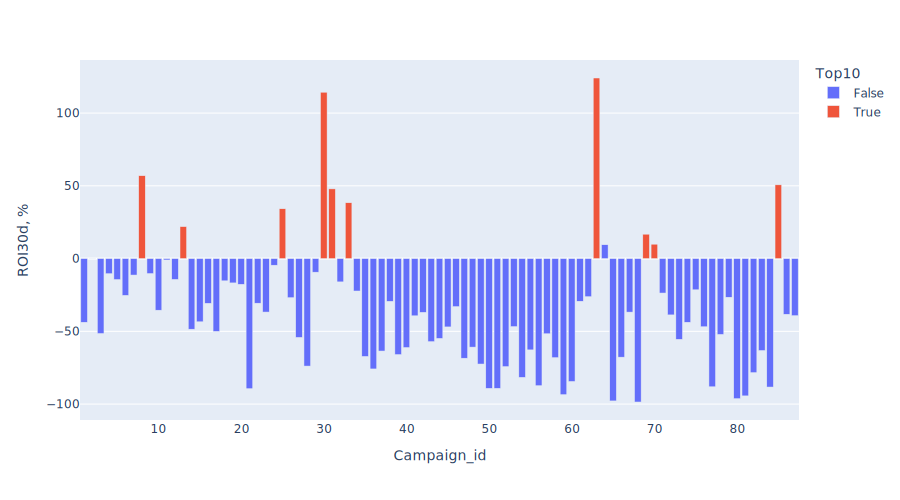

In [19]:
fig = px.bar(roi30d_data, x = 'Campaign_id', y = 'ROI30d, %', color = 'Top10', width = 900)
fig.show('svg');

In [20]:
roi30d_data.nlargest(10, 'ROI30d, %')[['Campaign_id', 'ROI30d, %']].round(2)

,Campaign_id,"ROI30d, %"
62,63,124.10
29,30,114.34
7,8,56.96
84,85,50.68
30,31,47.90
32,33,38.36
24,25,34.24
12,13,21.97
68,69,16.77
69,70,9.90


**Вывод**: Все кампании, которые были сепарированы в топ-10, имеют положительное значение ROI, то есть принесли доход. Однако только две кампании полностью окупились и принесли прибыль — они находятся на первом и втором месте по уровню ROI со значениями 124,1% и 114,34% и номерами 63 и 30 соответственно (они являются также выбросами, которые были упомянуты в выводе к вопросу 2). Большая часть кампаний имеют отрицательные значения ROI, то есть принесли убытки.

### RPI (Revenue per Install) - CPI (Cost per Install)

Оценим данные с точки зрения того, какую прибыль принесла каждая установка. Для этого посчитаем доход с каждой установки (RPI) и стоимость каждой установки (CPI) и найдем разницу этих значений, что и будет являться прибылью с каждой установки. Для расчетов используем значения выручки на 30 день жизни пользователей.

In [21]:
cpirpi_data = data[['Campaign_id', 'Geo', 'Buyer', 'Installs', 'Spend', 'Revenue_ad30d', 'Revenue_in_app30d']].copy()
cpirpi_data.head(3)

,Campaign_id,Geo,Buyer,Installs,Spend,Revenue_ad30d,Revenue_in_app30d
0,1,north america,buyer_1,33054,3208.440002,1527.013835,276.629998
1,2,north america,buyer_2,3401,1569.519999,1449.001828,120.250001
2,3,north america,buyer_1,13315,1231.999998,572.633765,24.700000


In [22]:
cpirpi_data['RPI'] = (cpirpi_data['Revenue_ad30d'] + cpirpi_data['Revenue_in_app30d']) / cpirpi_data['Installs']
cpirpi_data['CPI'] = cpirpi_data['Spend'] / cpirpi_data['Installs']
cpirpi_data['RPI - CPI'] = cpirpi_data['RPI'] - cpirpi_data['CPI']
cpirpi_data.nlargest(3, 'RPI - CPI')

,Campaign_id,Geo,Buyer,Installs,Spend,Revenue_ad30d,Revenue_in_app30d,RPI,CPI,RPI - CPI
62,63,north america,buyer_4,64,29.920000,67.051895,0.00,1.047686,0.467500,0.580186
7,8,north america,buyer_3,1249,521.509998,770.979189,47.56,0.655356,0.417542,0.237814
24,25,north america,buyer_3,239,153.510000,203.260172,2.81,0.862218,0.642301,0.219917


*Прим.: Так как выбросы в значениях CPI и (RPI - CPI) в кампании с `Campaign_id` = 81 мешают дальнейшему анализу, было принято решение заменить их на средние значения по столбцам, в которых они находятся.*

In [23]:
cpirpi_data.loc[cpirpi_data['CPI'] == cpirpi_data.nlargest(1, 'CPI')['CPI'].iloc[0], 'CPI'] = cpirpi_data['CPI'].mean()
cpirpi_data.loc[cpirpi_data['RPI - CPI'] == \
                cpirpi_data.nsmallest(1, 'RPI - CPI')['RPI - CPI'].iloc[0], 'RPI - CPI'] = cpirpi_data['RPI - CPI'].mean()

#### Вопрос 1: у каких кампаний самые дешевые установки (CPI)?

Чтобы ответить на этот вопрос, выделим 10 кампаний с самыми низкими CPI и построим barchart.

In [24]:
cpirpi_data_cpi = cpirpi_data[['Campaign_id', 'CPI']].copy()
cpirpi_data_cpi['Top10'] = False
cpirpi_data_cpi.loc[cpirpi_data_cpi['CPI'] <= cpirpi_data_cpi.nsmallest(10, 'CPI')['CPI'].iloc[9], 'Top10'] = True
cpirpi_data_cpi.head(3)

,Campaign_id,CPI,Top10
0,1,0.097067,False
1,2,0.461488,False
2,3,0.092527,False


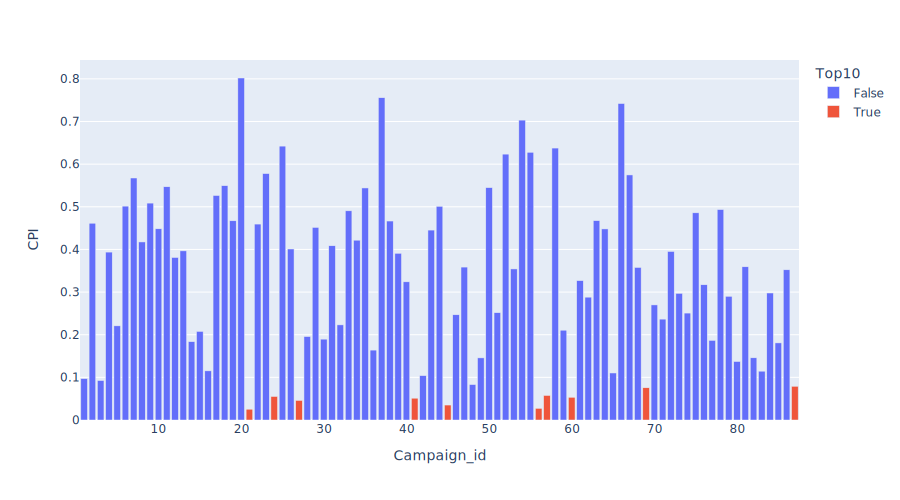

In [25]:
fig = px.bar(cpirpi_data_cpi, x = 'Campaign_id', y = 'CPI', color = 'Top10', width = 900)
fig.show('svg');

In [26]:
cpirpi_data_cpi.nsmallest(10, 'CPI')[['Campaign_id', 'CPI']].round(3)

,Campaign_id,CPI
20,21,0.025
55,56,0.027
44,45,0.035
26,27,0.046
40,41,0.051
59,60,0.053
23,24,0.055
56,57,0.058
68,69,0.076
86,87,0.079


**Вывод**: Таким образом, кампанией с самыми дешевыми установками оказалась кампания под номером 21 со значением CPI = 0,025. За ней расположились кампании 56 и 45 с CPI, равными 0,027 и 0,035 соответственно.

#### Вопрос 2: у каких кампаний прибыль с установок оказалась наибольшей?

Ответим на этот вопрос, построив barchart и выделив на нем топ-10 кампаний по разнице (RPI - CPI).

In [27]:
cpirpi_data_inc = cpirpi_data[['Campaign_id', 'RPI - CPI']].copy()
cpirpi_data_inc['Top10'] = False
cpirpi_data_inc.loc[cpirpi_data_inc['RPI - CPI'] >= \
                    cpirpi_data_inc.nlargest(10, 'RPI - CPI')['RPI - CPI'].iloc[9], 'Top10'] = True
cpirpi_data_inc.head(3)

,Campaign_id,RPI - CPI,Top10
0,1,-0.042500,False
1,2,-0.000079,False
2,3,-0.047666,False


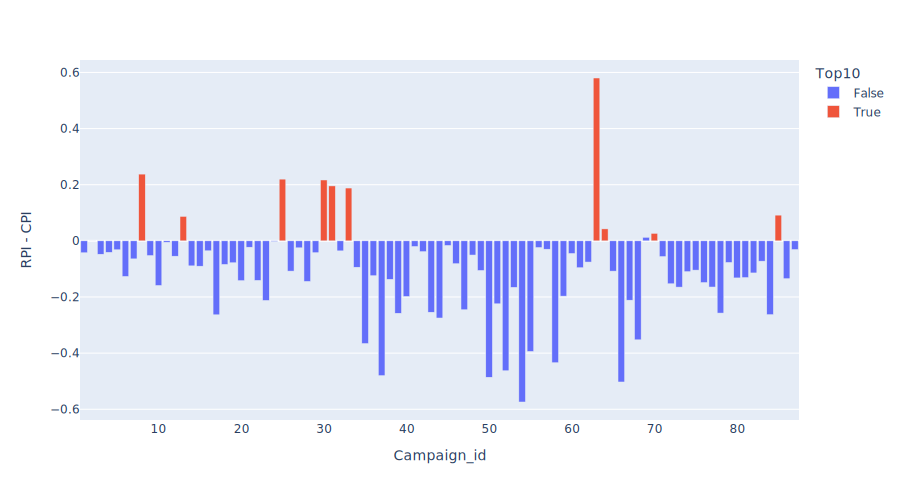

In [28]:
fig = px.bar(cpirpi_data_inc, x = 'Campaign_id', y = 'RPI - CPI', color = 'Top10', width = 900)
fig.show('svg');

In [29]:
cpirpi_data_inc.nlargest(10, 'RPI - CPI')[['Campaign_id', 'RPI - CPI']].round(2)

,Campaign_id,RPI - CPI
62,63,0.58
7,8,0.24
24,25,0.22
29,30,0.22
30,31,0.20
32,33,0.19
84,85,0.09
12,13,0.09
63,64,0.04
69,70,0.03


**Вывод**: С большим отрывом на первом месте оказалась кампания под номером 63 со значением (RPI - CPI) = 0,58. Она принесла наибольшую прибыль за установку. На втором и третьем месте стоят кампании с `Capmaign_id`, равными 8 (CPI = 0,24) и 25 (CPI = 0,22).

#### Вопрос 3: кампании каких медиабайеров получили наибольшую прибыль с установок?

На этот вопрос можно ответить, построив график boxplot, который покажет распределение значений (RPI - CPI) для каждого из медиабайеров.

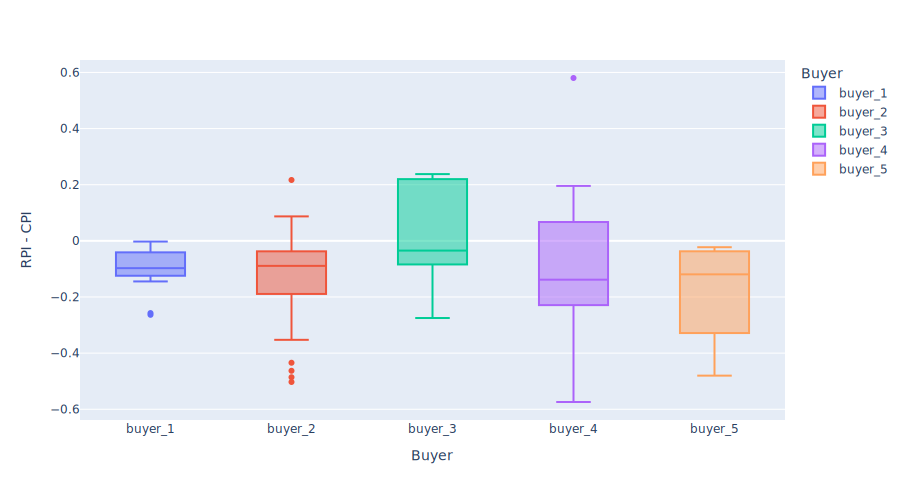

In [30]:
fig = px.box(cpirpi_data, x='Buyer', y='RPI - CPI', color = 'Buyer', width = 900)
fig.show('svg');

In [31]:
cpirpi_data.groupby('Buyer')['RPI - CPI'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Buyer,,,,,,,,
buyer_1,18.0,-0.095,0.074,-0.264,-0.122,-0.097,-0.041,-0.003
buyer_2,39.0,-0.130,0.152,-0.503,-0.181,-0.089,-0.039,0.217
buyer_3,6.0,0.005,0.196,-0.275,-0.079,-0.035,0.164,0.238
buyer_4,16.0,-0.078,0.266,-0.574,-0.221,-0.138,0.055,0.580
buyer_5,8.0,-0.184,0.176,-0.480,-0.296,-0.119,-0.044,-0.023


**Вывод**: Наибольшее медианное значение (RPI - CPI) принимает в кампаниях, проведенных третьим байером, где оно оказывается равно -0,035. Меньше всего прибыли за установку принесли четвертый и пятый байеры с медианными значениями -0,138 и -0,119 соответственно.

#### Вопрос 4: кампании в каких локациях получили наибольшую прибыль с установок?

Для оценки распределения (RPI - CPI) относительно геолокаций построим boxplot.

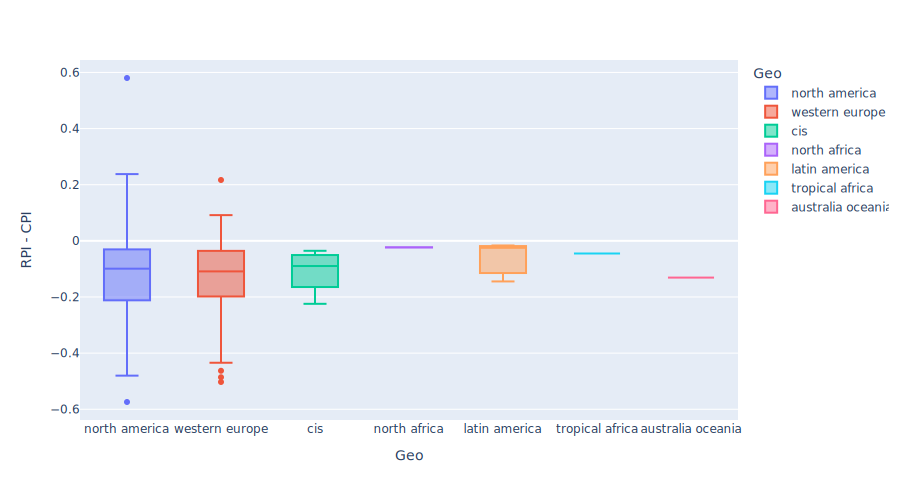

In [32]:
fig = px.box(cpirpi_data, x='Geo', y='RPI - CPI', color = 'Geo', width = 900)
fig.show('svg');

In [33]:
cpirpi_data.groupby('Geo')['RPI - CPI'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Geo,,,,,,,,
australia oceania,1.0,-0.131,NaN,-0.131,-0.131,-0.131,-0.131,-0.131
cis,10.0,-0.110,0.067,-0.224,-0.157,-0.090,-0.056,-0.035
latin america,3.0,-0.062,0.072,-0.145,-0.085,-0.025,-0.021,-0.016
north africa,2.0,-0.023,0.001,-0.024,-0.024,-0.023,-0.023,-0.023
north america,48.0,-0.101,0.192,-0.574,-0.212,-0.099,-0.031,0.580
tropical africa,1.0,-0.045,NaN,-0.045,-0.045,-0.045,-0.045,-0.045
western europe,22.0,-0.142,0.191,-0.503,-0.190,-0.109,-0.041,0.217


**Вывод**: На графике видно, что наибольшее медианное значение в Северной Африке — здесь оно равняется -0,023. За ней располагается Латинская Америка с медианным значением (RPI - CPI) = -0,025.

### Выручка

Оценим, какую долю выручки внесли в общий вклад кампании каждого из байеров. Для этого посчитаем общую выручку каждого байера на 30 день жизни пользователей.

In [34]:
revenue_data = data[['Buyer', 'Revenue_ad30d', 'Revenue_in_app30d', 'Spend']].groupby('Buyer').sum().reset_index()
revenue_data.head(3)

,Buyer,Revenue_ad30d,Revenue_in_app30d,Spend
0,buyer_1,3874.967751,413.729999,7211.150000
1,buyer_2,5624.460621,359.940003,7225.449996
2,buyer_3,2046.718896,111.750001,1953.720009


In [35]:
revenue_data['Revenue'] = revenue_data['Revenue_ad30d'] + revenue_data['Revenue_in_app30d']
revenue_data

,Buyer,Revenue_ad30d,Revenue_in_app30d,Spend,Revenue
0,buyer_1,3874.967751,413.729999,7211.150000,4288.697750
1,buyer_2,5624.460621,359.940003,7225.449996,5984.400624
2,buyer_3,2046.718896,111.750001,1953.720009,2158.468897
3,buyer_4,886.613370,75.930001,1141.070006,962.543371
4,buyer_5,211.155590,3.790000,641.039996,214.945590


#### Вопрос: кто из медиабайеров внес в общую выручку по рекламным кампаниям большую долю?

Для ответа на вопрос построим круговую диаграмму, которая отобразит, какую часть выручки вложил каждый из медиабайеров.

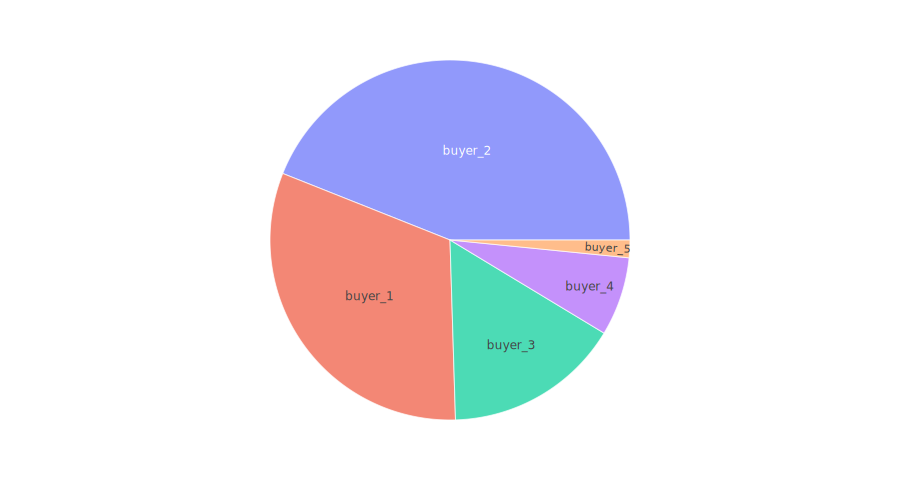

In [36]:
fig = px.sunburst(revenue_data, path = ['Buyer'], values = 'Revenue', width = 900)
fig.show('svg');

На диаграмме видно, что самую большую выручку принесли кампании второго медиабайера. Однако в этой диаграмме не учитываются затраты на проведение рекламных кампаний. Если учесть эти значения и рассчитать прибыль, получим следующий результат:

In [37]:
revenue_data['Income'] = revenue_data['Revenue_ad30d'] + revenue_data['Revenue_in_app30d'] - revenue_data['Spend']
revenue_data.nlargest(5, 'Income')[['Buyer', 'Revenue', 'Income']].round(2)

,Buyer,Revenue,Income
2,buyer_3,2158.47,204.75
3,buyer_4,962.54,-178.53
4,buyer_5,214.95,-426.09
1,buyer_2,5984.40,-1241.05
0,buyer_1,4288.70,-2922.45


**Вывод**: Единственный байер с положительным значением прибыли — это третий байер с Income = 204,75. Второй байер же оказался в таком случае на втором с конца месте со значением прибыли, равным -1241,05 (то есть, с убытком).

## Общий вывод

По результатам проведенного анализа можно сделать вывод о том, что лучше всего в проведении рекламных кампаний показал себя третий байер, так как именно он достиг наивысших значений практически по всем показателям, включая CTR, ROI, прибыль за установку и совокупную прибыль. Относительно геолокации, хороший результат стабильно показывает Северная Америка. Среди кампаний же тяжело выделить абсолютных лидеров, так как по каждой метрике лидирующие позиции сильно различаются.